<a href="https://colab.research.google.com/github/julyalua/Kaggle/blob/main/Exerc%C3%ADcio_valor_de_a%C3%A7%C3%B5es_Series_Temporais_AMBEV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pmdarima

import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from statsmodels.tsa.seasonal import seasonal_decompose

import pandas as pd
from pandas_datareader import data as web
import datetime as dt
import yfinance as yfin


yfin.pdr_override()
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.2 MB/s eta 0:00:00


encontrar o código 

[site do yahoo](https://finance.yahoo.com/)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-20,16.110001,16.370001,16.08,16.17,14.334554,23155100
2020-02-21,16.100000,16.250000,15.87,16.25,14.405472,27991000
2020-02-26,15.950000,16.059999,15.74,15.82,14.024282,42590700
2020-02-27,14.900000,14.970000,14.28,14.50,12.854115,91108200
2020-02-28,14.500000,14.540000,14.01,14.54,12.889574,45807500
...,...,...,...,...,...,...
2021-02-11,15.120000,15.220000,14.83,14.95,13.668288,17224700
2021-02-12,14.890000,14.970000,14.75,14.79,13.522005,17542300
2021-02-17,15.180000,15.400000,15.01,15.27,13.960854,30687100


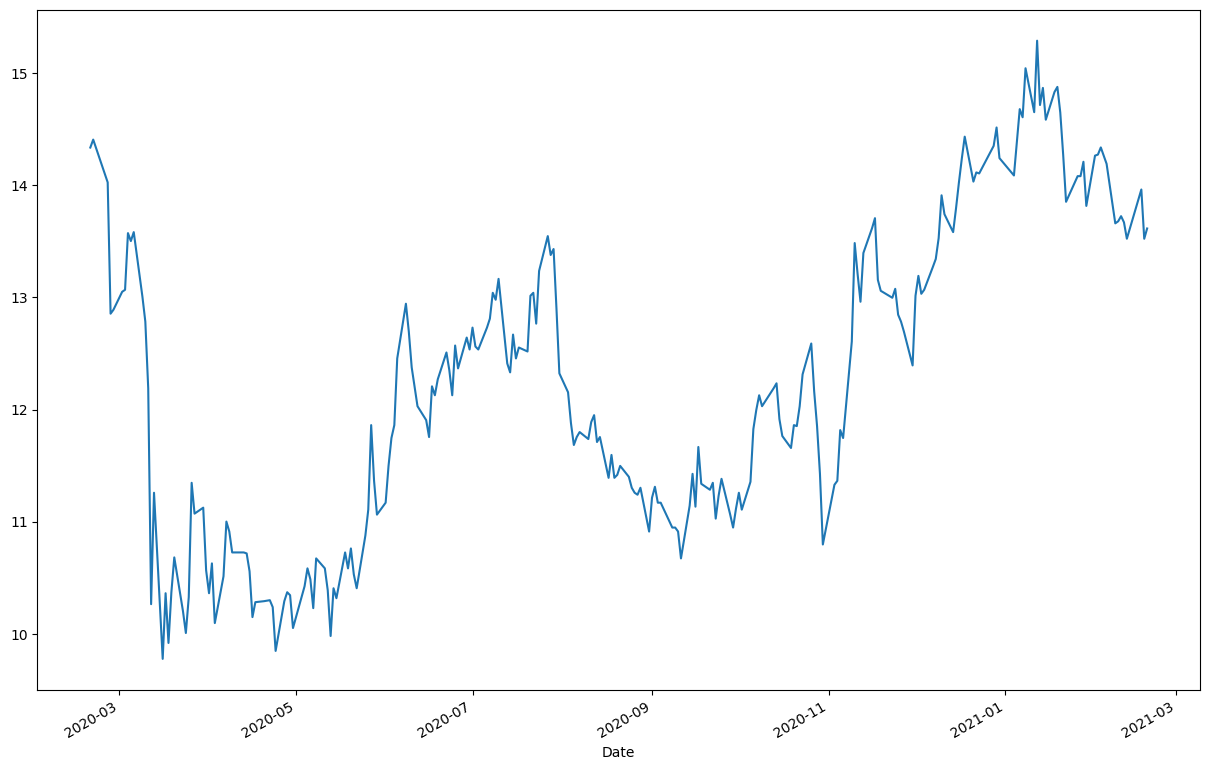

In [4]:
df = web.get_data_yahoo("ABEV3.SA", start=dt.datetime(2020,2,20), end=dt.datetime(2021,2,20))
display(df)
df["Adj Close"].plot(figsize=(15, 10))
plt.show()

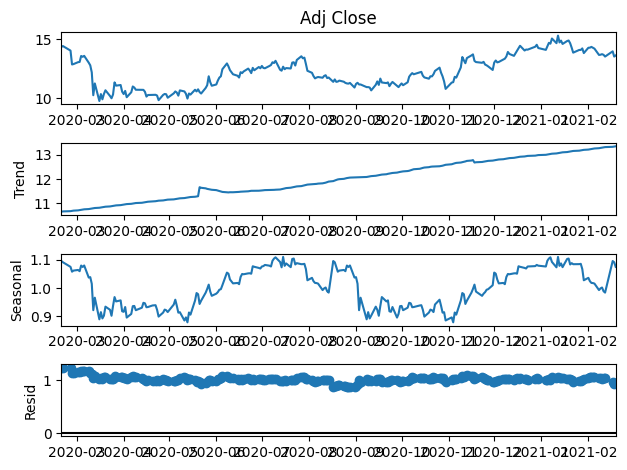

In [5]:
result = seasonal_decompose(df["Adj Close"], model='multiplicative',extrapolate_trend='freq', period = round(len(df)/2)-1)
result.plot();

adfuller $$p < 0.05$$


In [ ]:
adfuller(result.resid)[1]

7.898311768383938e-05

[texto do link](https://people.duke.edu/~rnau/411arim.htm)

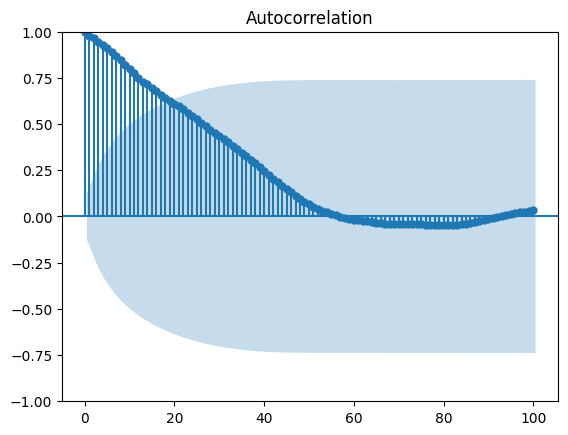

In [ ]:
plot_acf(df['Adj Close'], lags = 100);

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


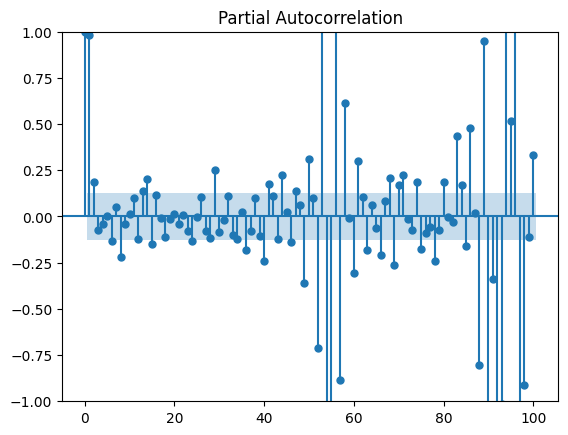

In [ ]:
plot_pacf(df['Adj Close'], lags = 100);

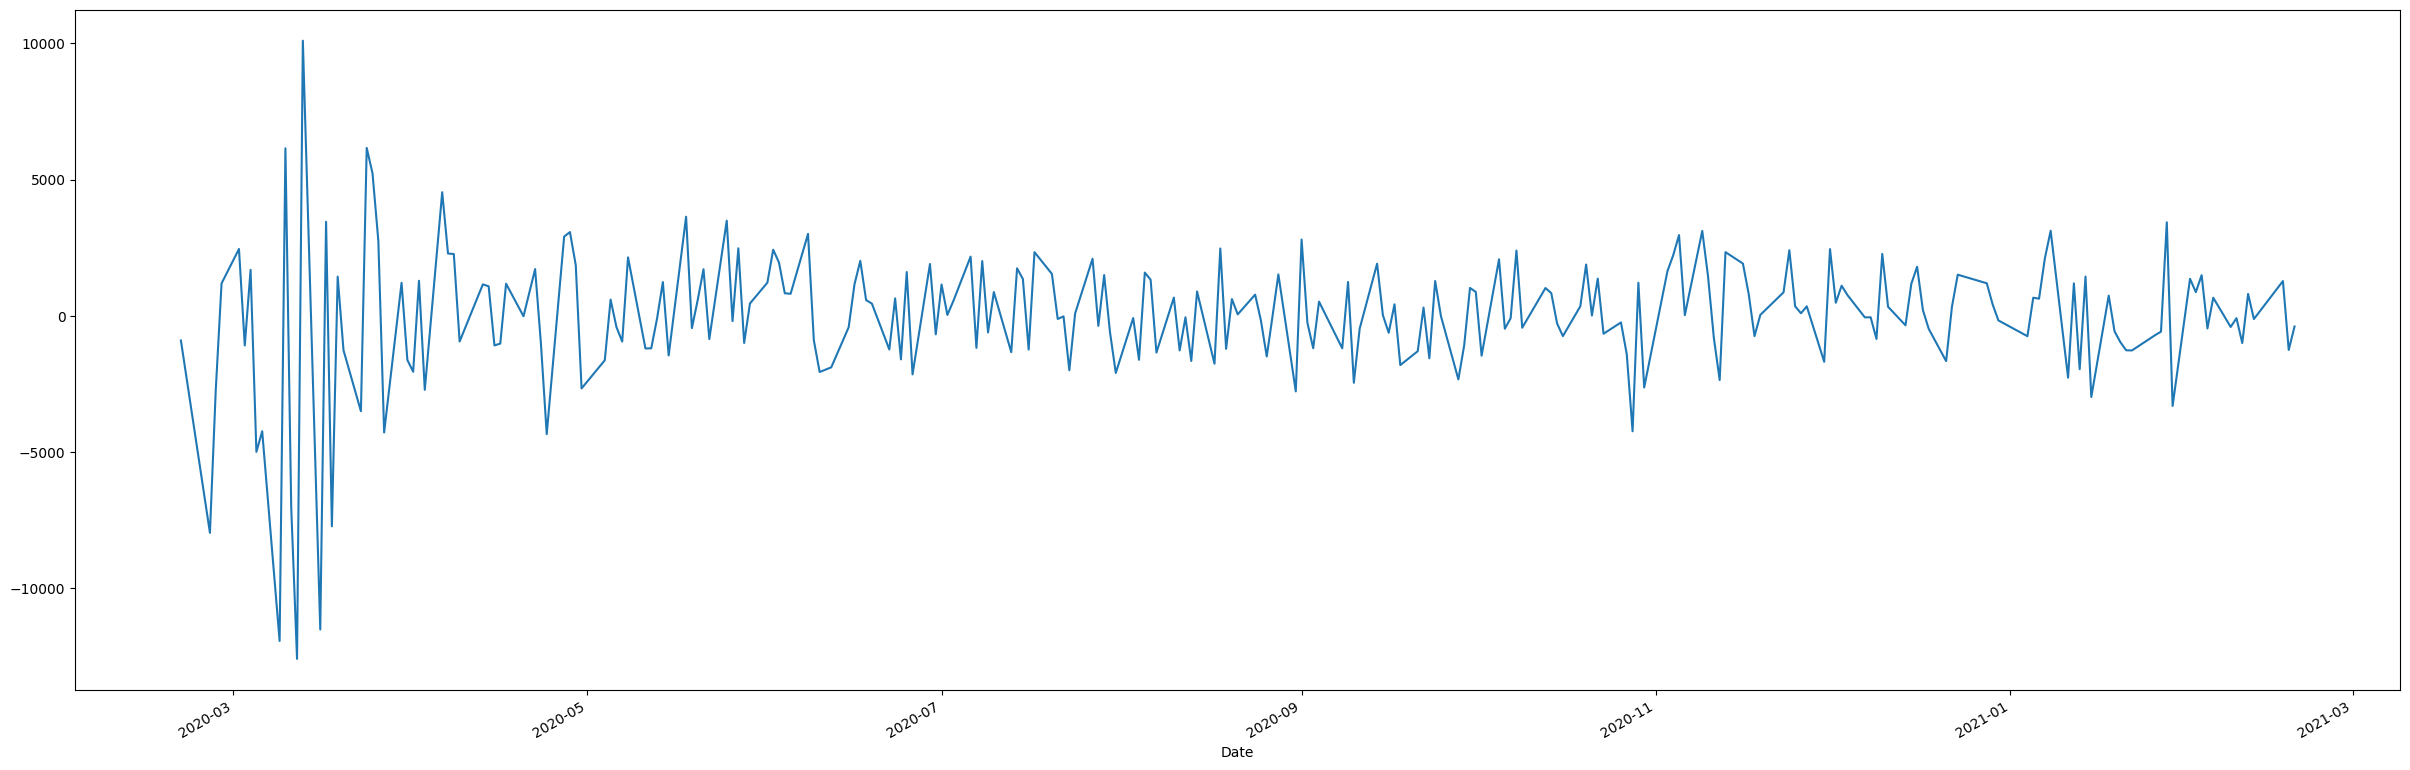

In [ ]:
diff = df['Adj Close'].diff()
diff.plot(figsize=(30,10));

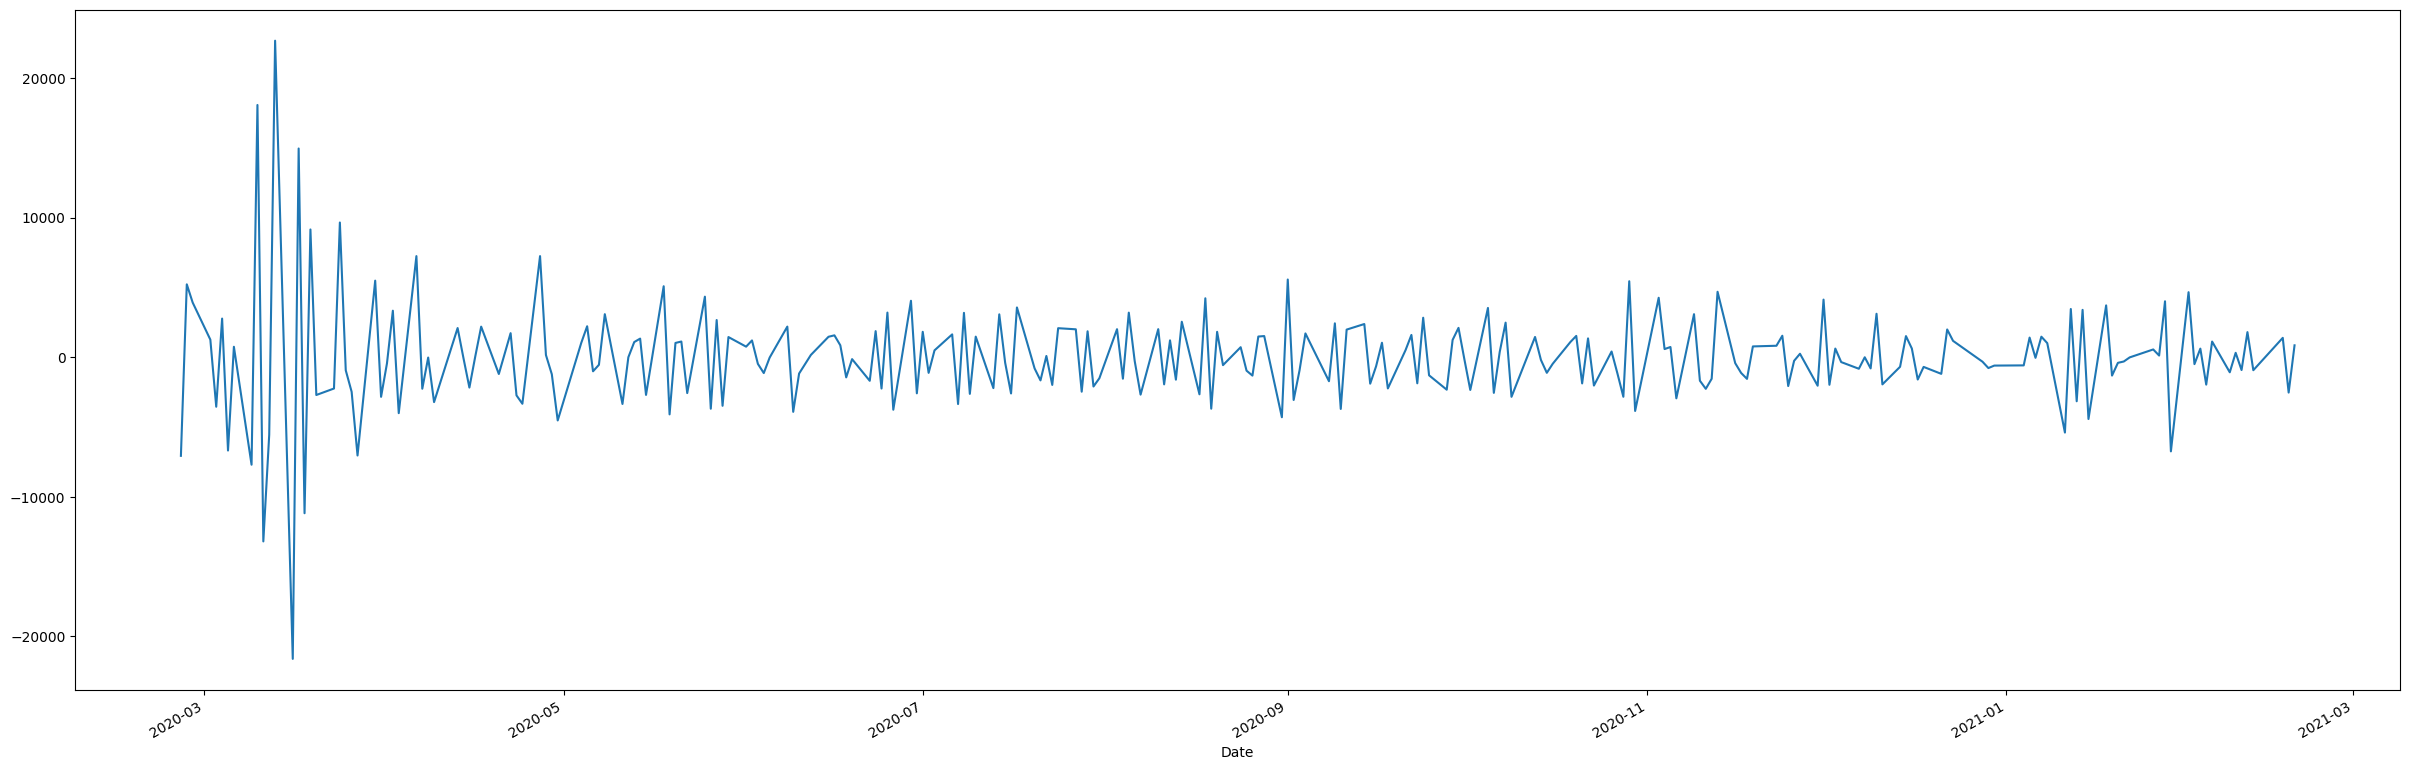

In [ ]:
diff_2 = diff.diff()
diff_2.plot(figsize=(30,10));

Automaticamente número de diferenciações

In [ ]:
ndiffs(df['Adj Close'])

1

Akaike Information Criterion menor melhor

In [ ]:

smodel = pm.auto_arima(df['Adj Close'],
                       start_p=1, max_p=3,
                       start_q=1, max_q=3,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4492.201, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4504.263, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4503.741, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4504.019, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4504.263, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4494.529, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4504.006, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4502.278, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4501.870, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4494.292, Time=1.54 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4492.201, Time=1.07 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 5.381 seconds


In [ ]:
df['Adj Close'].size

245

In [ ]:
train = df['Adj Close'][0:round(df['Adj Close'].size*0.97)]
test = df['Adj Close'][round(df['Adj Close'].size*0.97):]

# Construindo modelo a partir do resultado anterior de melhor modelo
arima = ARIMA(train, order=(1, 1, 1))  
arima = arima.fit()



forecast_results = arima.get_forecast(len(test), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
forecast.index = test.index
forecast

Date
2021-02-09    119444.207188
2021-02-10    119379.980339
2021-02-11    119322.522107
2021-02-12    119271.119173
2021-02-17    119225.133393
2021-02-18    119183.993875
2021-02-19    119147.189889
Name: predicted_mean, dtype: float64

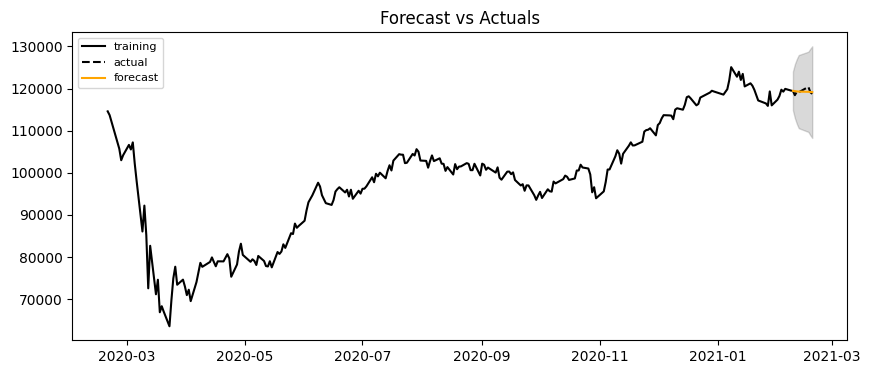

In [ ]:
    fc_series = pd.Series(forecast, index=test.index)
    lower_series = pd.Series(confidence_int[:,0], index=test.index)
    upper_series = pd.Series(confidence_int[:,1], index=test.index)

    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);


In [ ]:
forecast_results = arima.forecast(len(test)+2, alpha=0.05)
#forecast_results[forecast_results.size-1]
forecast_results.iloc[-1]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


119084.80904941123

In [ ]:
web.get_data_yahoo("^BVSP", start=dt.datetime(2021,2,20), end=dt.datetime(2021,2,23))['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2021-02-22    112668.0
Name: Adj Close, dtype: float64